In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [3]:
pokemon = pd.read_csv('pokemon.csv')
print(pokemon.shape)
pokemon.head(10)

(807, 14)


,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65
5,6,charizard,1,1.7,90.5,240,fire,flying,78,84,78,100,109,85
6,7,squirtle,1,0.5,9.0,63,water,NaN,44,48,65,43,50,64
7,8,wartortle,1,1.0,22.5,142,water,NaN,59,63,80,58,65,80
8,9,blastoise,1,1.6,85.5,239,water,NaN,79,83,100,78,85,105
9,10,caterpie,1,0.3,2.9,39,bug,NaN,45,30,35,45,20,20


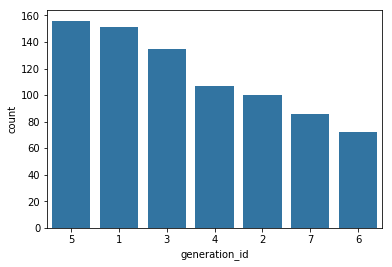

In [3]:
# get index of order
gen_order = pokemon['generation_id'].value_counts().index

sb.countplot(data = pokemon, x='generation_id', color=sb.color_palette()[0], order = gen_order);

**xticks**

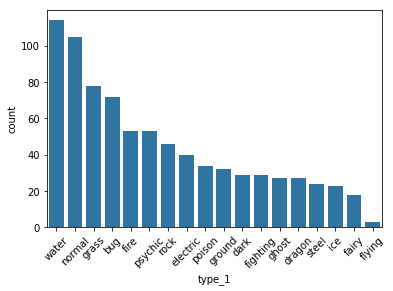

In [4]:
type_order = pokemon['type_1'].value_counts().index

sb.countplot(data = pokemon, x = 'type_1', color = sb.color_palette()[0], order=type_order);

# xticks: Rotate label by 90 degree
plt.xticks(rotation = 45);

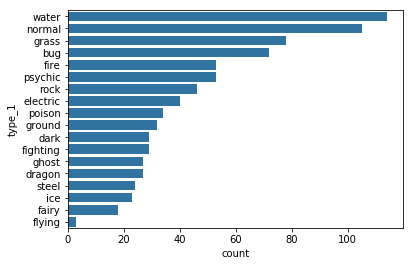

In [5]:
type_order = pokemon['type_1'].value_counts().index

sb.countplot(data = pokemon, y = 'type_1', color = sb.color_palette()[0], order=type_order);

In [6]:
pkmn_types = pokemon.melt(id_vars=['id','species'], value_vars=['type_1', 'type_2'],var_name='type_level',value_name='type').dropna()
pkmn_types[803:812]

,id,species,type_level,type
803,804,naganadel,type_1,poison
804,805,stakataka,type_1,rock
805,806,blacephalon,type_1,fire
806,807,zeraora,type_1,electric
807,1,bulbasaur,type_2,poison
808,2,ivysaur,type_2,poison
809,3,venusaur,type_2,poison
812,6,charizard,type_2,flying
818,12,butterfree,type_2,flying


In [7]:
type_counts = pkmn_types['type'].value_counts()
type_order = type_counts.index

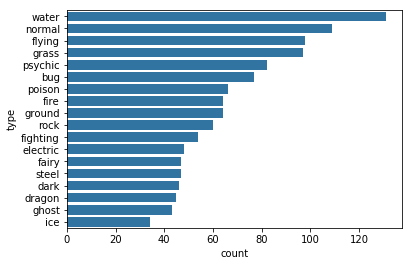

In [8]:
base_color = sb.color_palette()[0]
sb.countplot(data = pkmn_types, y='type', color=base_color, order=type_order);

In [9]:
n_pokemon = pokemon.shape[0]
max_type_counts = type_counts[0]
max_prop = max_type_counts / n_pokemon
print(max_prop)

0.1623296158612144


In [10]:
tick_props = np.arange(0, max_prop, 0.02)
print(tick_props)
tick_names = ['{:0.2f}'.format(v) for v in tick_props ]
print(tick_names)

[0.   0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16]
['0.00', '0.02', '0.04', '0.06', '0.08', '0.10', '0.12', '0.14', '0.16']


[  0.    16.14  32.28  48.42  64.56  80.7   96.84 112.98 129.12]


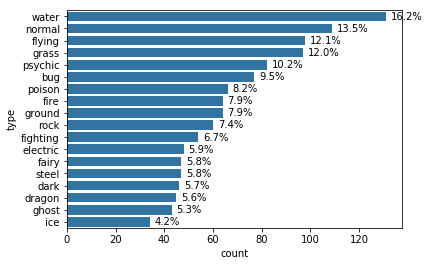

In [26]:
print(n_pokemon * tick_props)
sb.countplot(data = pkmn_types, y='type', color=base_color, order=type_order);
#plt.xticks(tick_props * n_pokemon, tick_names);
#plt.xlabel('proportion')

for i in range(type_counts.shape[0]):
    count = type_counts[i]
    pct_string = '{:0.1f}%'.format(100 * count / n_pokemon)
    plt.text(count+2, i, pct_string, va = 'center')

Index is: 
 Index(['id', 'species', 'generation_id', 'height', 'weight', 'base_experience',
       'type_1', 'type_2', 'hp', 'attack', 'defense', 'speed',
       'special-attack', 'special-defense'],
      dtype='object') Value is:  ['id' 'species' 'generation_id' 'height' 'weight' 'base_experience'
 'type_1' 'type_2' 'hp' 'attack' 'defense' 'speed' 'special-attack'
 'special-defense']


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

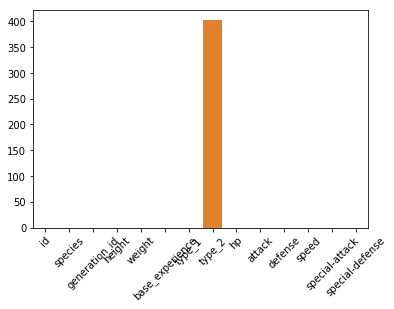

In [38]:
na_counts = pokemon.isna().sum()
#print(na_counts)
print('Index is: \n', na_counts.index, 'Value is: ', na_counts.index.values)
base_color = sb.color_palette()[1]

#The first value is colume name ,the second value is colume value.
sb.barplot(na_counts.index.values, na_counts, color = base_color);
plt.xticks(rotation=45)

### Histgram

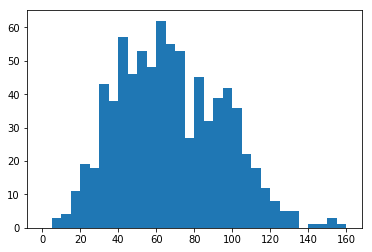

In [16]:
# bins 指的是每一条的宽度。
# arange可以用来协助找到bin的宽度值
bins = np.arange(0, pokemon['speed'].max() + 5, 5)
plt.hist(data = pokemon, x = 'speed', bins = bins);

#### subplot, figure

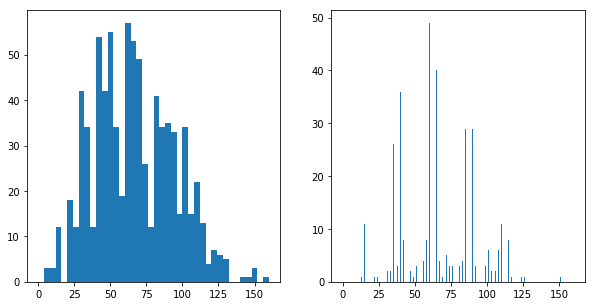

In [21]:
# Larger figure size for subplots
# figure 就是图片的意思。下面的[10, 5] 指图片的长宽。
plt.figure(figsize = [10, 5]) 
# histgram on left, example of too-large bin size.
plt.subplot(1,2,1) # 1 raw 2 colume, subplot 1
bin_edge = np.arange(0, pokemon['speed'].max() + 4, 4)
plt.hist(data = pokemon, x = 'speed', bins = bin_edge);

# histgram on right, example of too-small bin size.
plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot2
bin_edge = np.arange(0, pokemon['speed'].max() + 1/4, 1/4)
plt.hist(data =pokemon, x = 'speed', bins = bin_edge);



#### distplot

distplot 生成的曲线面积为1.

sb.distplot可以自适应，快速的自动生成比较好的bin size，如果想快速的看一下效果可以用distplot，但是大多数情况下如果只是想看histgram 最好还是用matplot 的hist。如果想用类似这种曲线功能可以考虑用 distplot。

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


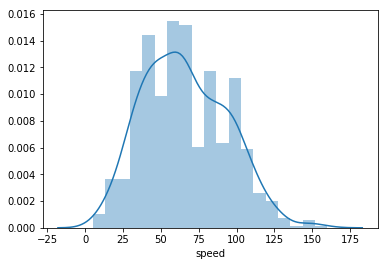

In [14]:
# sb.distplot 也可以生成histgram
sb.distplot(pokemon['speed']);

### Choosing a Plot for Discrete Data

If you want to plot a discrete quantitative variable, there’s a couple of ideas that you’ll want to consider. Since data points fall on set values, it can help to reduce ambiguity by putting bin edges between the actual values taken by the data. Your readers may not know that values on bin edges end up in the bin to their right, so this can help remove potential confusion. Compare the two visualizations of 100 random die rolls below (in die_rolls), with bin edges on the values on the left, and bin edges in between values on the right.

```python
plt.figure(figsize = [10, 5])

# histogram on the left, bin edges on integers
plt.subplot(1, 2, 1)
bin_edges = np.arange(2, 12+1.1, 1) # note `+1.1`, see below
plt.hist(die_rolls, bins = bin_edges)
plt.xticks(np.arange(2, 12+1, 1))

# histogram on the right, bin edges between integers
plt.subplot(1, 2, 2)
bin_edges = np.arange(1.5, 12.5+1, 1)
plt.hist(die_rolls, bins = bin_edges)
plt.xticks(np.arange(2, 12+1, 1))
```
![18090202.jpg](img/18090202.jpg)

The same data is plotted in both subplots, but the alignment of the bin edges is different.
You'll notice for the left histogram, in a deviation from the examples that have come before, I've added 1.1 to the max value (12) for setting the bin edges, rather than just the desired bin width of 1. Recall that data that is equal to the rightmost bin edge gets lumped in to the last bin. This presents a potential problem in perception when a lot of data points take the maximum value, and so is especially relevant when the data takes on discrete values. The 1.1 adds an additional bin to the end to store the die rolls of value 12 alone, to avoid having the last bar catch both 11 and 12.

As an additional step, consider if a bar chart with non-connected bins might serve your purposes better. The plot below takes the code from before, but adds the "rwidth" parameter to set the proportion of the bin widths that will be filled by each histogram bar.

```python
bin_edges = np.arange(1.5, 12.5+1, 1)
plt.hist(die_rolls, bins = bin_edges, rwidth = 0.7)
plt.xticks(np.arange(2, 12+1, 1))
```
![18090201.jpg](img/18090201.jpg)
Gaps between bars makes it clear that the data is discrete in nature.
By adding gaps between bars, you emphasize the fact that the data is discrete in value. On the other hand, plotting your quantitative data in this manner might cause it to be interpreted as ordinal-type data, which can have an effect on overall perception.

For continuous numeric data, you should not make use of the "rwidth" parameter, since the gaps imply discreteness of value. As another caution, it might be tempting to use seaborn's countplot function to plot the distribution of a discrete numeric variable as bars. Be careful about doing this, since each unique numeric value will get a bar, regardless of the spacing in values between bars. Also, even if your data is technically discrete numeric, you should probably not consider either of the variants depicted on this page unless the number of unique values is small enough to allow for the half-unit shift or discrete bars to be interpretable. If you have a large number of unique values over a large enough range, it's better to stick with the standard histogram than risk interpretability issues.

While you might justify plotting discrete numeric data using a bar chart, you’ll be less apt to justify the opposite: plotting ordinal data as a histogram. The space between bars in a bar chart helps to remind the reader that values are not contiguous in an ‘interval’-type fashion: only that there is an order in levels. With that space removed as in a histogram, it's harder to remember this important bit of interpretation.

### Xlim
### Descriptive Statistics, Outliers, and Axis Limits
As you create your plots and perform your exploration, make sure that you pay attention to what the plots tell you that go beyond just the basic descriptive statistics. Note any aspects of the data like number of modes and skew, and note the presence of outliers in the data for further investigation.

Related to the latter point, you might need to change the limits or scale of what is plotted to take a closer look at the underlying patterns in the data. This page covers the topic of axis limits; the next the topic of scales and transformations. In order to change a histogram's axis limits, you can add a Matplotlib xlim call to your code. The function takes a tuple of two numbers specifying the left and right bounds of the region to plot. Alternatively, the xlim function can be called with two numeric arguments to the same result.

```python
plt.figure(figsize = [10, 5])

# histogram on left: full data
plt.subplot(1, 2, 1)
bin_edges = np.arange(0, df['skew_var'].max()+2.5, 2.5)
plt.hist(data = df, x = 'skew_var', bins = bin_edges)

# histogram on right: focus in on bulk of data < 35
plt.subplot(1, 2, 2)
bin_edges = np.arange(0, 35+1, 1)
plt.hist(data = df, x = 'skew_var', bins = bin_edges)
plt.xlim(0, 35) # could also be called as plt.xlim((0, 35))
```
![18090207.jpg](img/18090207.jpg)
In the generic example above, we might be interested in comparing patterns in other variables between data points that take values less than 35 to those that take values greater than 35. For anything that is concentrated on the bulk of the data in the former group (< 35), use of axis limits can allow focusing on data points in that range without needing to go through creation of a new DataFrame filtering out the data points in the latter group (> 35).

### Scale and Transformations

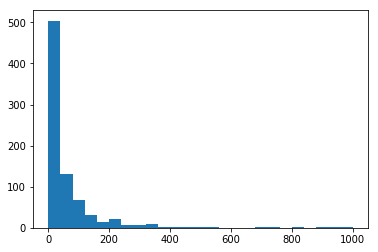

In [22]:
bins = np.arange(0, pokemon['weight'].max()+40, 40)
plt.hist(data=pokemon, x='weight', bins=bins);


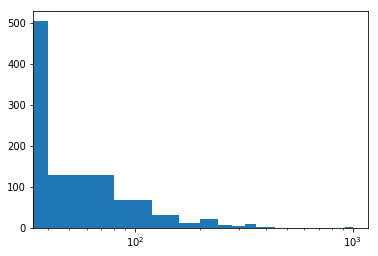

In [25]:
bins = np.arange(0, pokemon['weight'].max()+40, 40)
plt.hist(data=pokemon, x='weight', bins=bins);
plt.xscale('log')

In [26]:
pokemon['weight'].describe()

count    807.000000
mean      61.771128
std      111.519355
min        0.100000
25%        9.000000
50%       27.000000
75%       63.000000
max      999.900000
Name: weight, dtype: float64

In [27]:
np.log10(pokemon['weight']).describe()

count    807.000000
mean       1.364366
std        0.670968
min       -1.000000
25%        0.954243
50%        1.431364
75%        1.799341
max        2.999957
Name: weight, dtype: float64

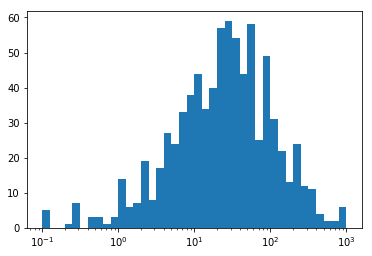

In [33]:
bins = 10 ** np.arange(-1, 3 + 0.1, 0.1)
plt.hist(data = pokemon, x = 'weight', bins = bins);
plt.xscale('log')

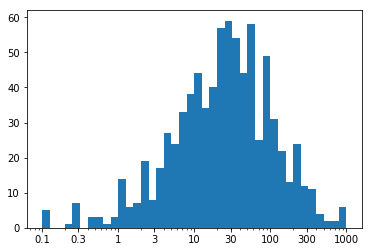

In [34]:
bins = 10 ** np.arange(-1, 3 + 0.1, 0.1)
ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data = pokemon, x = 'weight', bins = bins);
plt.xscale('log');
plt.xticks(ticks, labels);

### Scales and Transformations

Certain data distributions will find themselves amenable to scale transformations. The most common example of this is data that follows an approximately log-normal distribution. This is data that, in their natural units, can look highly skewed: lots of points with low values, with a very long tail of data points with large values. Take the logarithm of those values, however, and the data looks normally distributed.
```python
plt.figure(figsize = [10, 5])

# histogram on left: natural units
plt.subplot(1, 2, 1)
bin_edges = np.arange(0, ln_data.max()+100, 100)
plt.hist(ln_data, bins = bin_edges)

# histogram on right: directly log-transform data
plt.subplot(1, 2, 2)
log_ln_data = np.log10(ln_data)
log_bin_edges = np.arange(0.8, log_ln_data.max()+0.1, 0.1)
plt.hist(log_ln_data, bins = log_bin_edges)
plt.xlabel('log(values)') # add axis label for clarity
```
(Documentation: [numpy log10](https://docs.scipy.org/doc/numpy/reference/generated/numpy.log10.html), [matplotlib xlabel](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.xlabel.html))

![18090203.jpg](img/18090203.jpg)

In the left plot, the high-value points above 1000 mash most of the points into the bins on the far left. With the right plot, the logarithmic transform makes those points look in line with the rest, with the data looking unimodal overall. The big problem with the right-side plot is that the units on the x-axis are difficult to interpret: for most people, it is only easy to convert from log values to natural values on the integers (and this assumes a nice base like 10 as used in the example).

This is where scale transformations are handy. In a scale transformation, the gaps between values are based on the transformed scale, but you can interpret data in the variable's natural units. It is also a convenient approach since you won't need to engineer new features. Matplotlib's xscale function includes a few built-in transformations: we'll use the 'log' scale here.
```python
bin_edges = np.arange(0, ln_data.max()+100, 100)
plt.hist(ln_data, bins = bin_edges)
plt.xscale('log')
```
![18090204.jpg](img/18090204.jpg)

Notice two things about the plot now. Even though the data is on a log scale, the bins are still linearly spaced. This means that they change size from wide on the left to thin on the right, as the values increase multiplicatively. Secondly, the default label settings are still somewhat tricky to interpret, and are sparse as well.

To address the bin size issue, we just need to change them so that they are evenly-spaced powers of 10. Depending on what you are plotting, a different base power like 2 might be useful instead. For the ticks, we can use xticks to specify locations and labels in their natural units. Remember: we aren't changing the values taken by the data, only how they're displayed. Between integer powers of 10, we don't have clean values for even markings, but we can still get close. Setting ticks in cycles of 1-3-10 or 1-2-5-10 are very useful for base-10 log transforms.

```python
bin_edges = 10 ** np.arange(0.8, np.log10(ln_data.max())+0.1, 0.1)
plt.hist(ln_data, bins = bin_edges)
plt.xscale('log')
tick_locs = [10, 30, 100, 300, 1000, 3000]
plt.xticks(tick_locs, tick_locs)
```
It is important that the xticks are specified after xscale since that function has its own built-in tick settings.
![18090205.jpg](img/18090205.jpg)

We've ended up with the same plot as when we performed the direct log transform, but now with a much nicer set of tick marks and labels.

####Alternative Approach
Be aware that a logarithmic transform is not the only one possible. When we perform a logarithmic transform, our data values have to all be positive; it's impossible to take a log of zero or a negative number. In addition, the transformation implies that additive steps on the log scale will result in multiplicative changes in the natural scale, an important implication when it comes to data modeling. The type of transform that you choose may be informed by the context for the data. For example, this Wikipedia section provides a few examples of places where log-normal distributions have been observed.

If you want to use a different transformation that's not available in xscale, then you'll have to perform some feature engineering. In cases like this, we want to be systematic by writing a function that applies both the transformation and its inverse. The inverse will be useful in cases where we specify values in their transformed units and need to get the natural units back. For the purposes of demonstration, let's say that we want to try plotting the above data on a square-root transformation. (Perhaps the numbers represent areas, and we think it makes sense to model the data on a rough estimation of radius, length, or some other 1-d dimension.) We can create a visualization on this transformed scale like this:

```python
def sqrt_trans(x, inverse = False):
    """ transformation helper function """
    if not inverse:
        return np.sqrt(x)
    else:
        return x ** 2

bin_edges = np.arange(0, sqrt_trans(ln_data.max())+1, 1)
plt.hist(ln_data.apply(sqrt_trans), bins = bin_edges)
tick_locs = np.arange(0, sqrt_trans(ln_data.max())+10, 10)
plt.xticks(tick_locs, sqrt_trans(tick_locs, inverse = True).astype(int))
```
Note that ln_data is a pandas Series, so we can use the apply method for the function. If it were a NumPy Array, we would need to apply the function like in the other cases. The tick locations could have also been specified with the natural values, where we apply the standard transform function on the first argument of xticks instead.

![18090206.jpg](img/18090206.jpg)

At the end of this lesson and the next, you’ll find some extra concepts that didn’t really fit into the main flow. These concepts will cover a few additional univariate plots that you might be interested in using or might observe in your own research. While bar charts and histograms should cover your most common needs, the plots in this section might prove useful for both the exploratory and explanatory sides of data visualization.

----

### Kernel Density Estimation
Earlier in this lesson, you saw an example of [kernel density estimation (KDE)](https://en.wikipedia.org/wiki/Kernel_density_estimation) through the use of seaborn's distplot function, which plots a KDE on top of a histogram.

```python
sb.distplot(df['num_var'])
```
![18090208.jpg](img/18090208.jpg)

Kernel density estimation is one way of estimating the probability density function of a variable. In a KDE plot, you can think of each observation as replaced by a small ‘lump’ of area. Stacking these lumps all together produces the final density curve. The default settings use a normal-distribution kernel, but most software that can produce KDE plots also include other kernel function options.

Seaborn's distplot function calls another function, kdeplot, to generate the KDE. The demonstration code below also uses a third function called by distplot for illustration, rugplot. In a rugplot, data points are depicted as dashes on a number line.

```python
data = [0.0, 3.0, 4.5, 8.0]
plt.figure(figsize = [12, 5])

# left plot: showing kde lumps with the default settings
plt.subplot(1, 3, 1)
sb.distplot(data, hist = False, rug = True, rug_kws = {'color' : 'r'})

# central plot: kde with narrow bandwidth to show individual probability lumps
plt.subplot(1, 3, 2)
sb.distplot(data, hist = False, rug = True, rug_kws = {'color' : 'r'},
            kde_kws = {'bw' : 1})

# right plot: choosing a different, triangular kernel function (lump shape)
plt.subplot(1, 3, 3)
sb.distplot(data, hist = False, rug = True, rug_kws = {'color' : 'r'},
            kde_kws = {'bw' : 1.5, 'kernel' : 'tri'})
```
![18090209.jpg](img/18090209.jpg)

Interpreting proportions from this plot type is slightly trickier than a standard histogram; the vertical axis indicates a density of data rather than straightforward proportions. Under a KDE plot, the total area between the 0-line and the curve will be 1. The probability of an outcome falling between two values is found by computing the area under the curve that falls between those values. Making area judgments like this without computer assistance is difficult and likely to be inaccurate.

Despite the fact that making specific probability judgments are not as intuitive with KDE plots as histograms, there are still reasons to use kernel density estimation. If there are relatively few data points available, KDE provides a smooth estimate of the overall distribution of data. These ideas may not be so easily conveyed through histograms, in which the large discreteness of jumps may end up misleading.

It should also be noted that there is a bandwidth parameter in KDE that specifies how wide the density lumps are. Similar to bin width for histograms, we need to choose a bandwidth size that best shows the signal in the data. A too-small bandwidth can make the data look noisier than it really is, and a too-large bandwidth can smooth out useful features that we could use to make inferences about the data. It’s good to keep this in mind in case the default bandwidths chosen by your visualization software don’t look quite right or if you need to perform further investigations.

## Bivariate Plots

1. Scatterplots for quantitative variable vs. quantitative variable
2. Violin plots for quantitative variable vs. qualitative variable
3. Clustered bar charts for quanlitative variable vs. quanlitative variable.

### Scatterplots and Correlation

#### Pear Correlation Coefficient
Statistic quantifying the stength of linear correlaiton bwtween two numneric variables.

The statistic takes a value between negative one and one. Positive numbers indicate relationshiop where positive changes in one variable a associated with positive changes in the second. Negative value indicates when one variable increase the second variable decrease. Values close to the extremes of nagetive one or one indicate a stronger, more predictable relationship while values colse to zero indicate a weaker relation ship.The correlaiton coefficient doesn't necessarily tell you anything about steepness of a line that models the relationship. And most importantly the Pearson Correlation Coefficient only captures linear relationships.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
fuel_econ = pd.read_csv('fuel_econ.csv')
print(fuel_econ.shape())
fuel_econ.head()

(3929, 20)


,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


#### plt.scatter

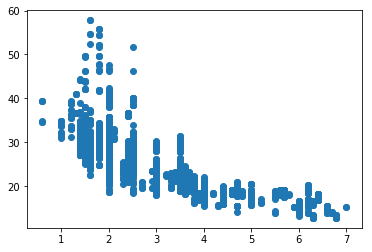

In [8]:
# One way to create scatter plot
plt.scatter(data = fuel_econ, x = 'displ', y = 'comb');
#plt.xlable('Displacement:(1)');
#plt.ylable('Combined Fuel Eff. (mpg)');

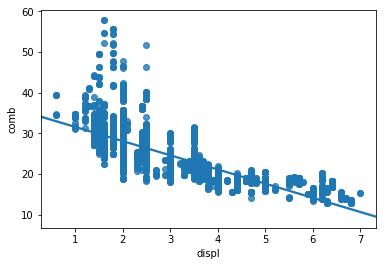

In [9]:
# Another way to create scatter plot
sb.regplot(data = fuel_econ, x = 'displ', y = 'comb');


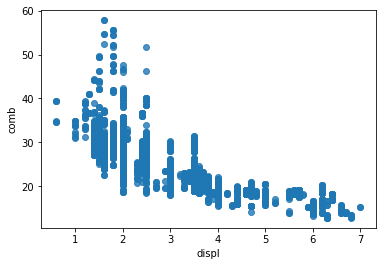

In [11]:
# To turn off regression line
sb.regplot(data = fuel_econ, x = 'displ', y = 'comb', fit_reg = False);

# Scatterplots
If we want to inspect the relationship between two numeric variables, the standard choice of plot is the scatterplot. In a scatterplot, each data point is plotted individually as a point, its x-position corresponding to one feature value and its y-position corresponding to the second. One basic way of creating a scatterplot is through Matplotlib's scatter function:
```python
plt.scatter(data = df, x = 'num_var1', y = 'num_var2')
```
![18090210.jpg](img/18090210.jpg)

We can see a generally positive relationship between the two variables, as higher values of the x-axis variable are associated with greatly increasing values of the variable plotted on the y-axis.

#### Alternative Approach
Seaborn's regplot function combines scatterplot creation with regression function fitting:
```python
sb.regplot(data = df, x = 'num_var1', y = 'num_var2')
```
![18090211.jpg](img/18090211.jpg)

By default, the regression function is linear, and includes a shaded confidence region for the regression estimate. In this case, since the trend looks like a log(y) ~ x relationship, plotting the regression line on the raw units is not appropriate. If we don't care about the regression line, then we could set reg_fit = False in the regplot function call. Otherwise, if we want to plot the regression line on the observed relationship in the data, we need to transform the data, as seen in the previous lesson.
```python
def log_trans(x, inverse = False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

sb.regplot(df['num_var1'], df['num_var2'].apply(log_trans))
tick_locs = [10, 20, 50, 100, 200, 500]
plt.yticks(log_trans(tick_locs), tick_locs)
```

Note that the x- and y- values can be set as Series or arrays directly, instead of columns from a reference dataframe.

![18090212.jpg](img/18090212.jpg)

### Overplotting, Transparency, and Jitter
If we have a very large number of points to plot or our numeric variables are discrete-valued, then it is possible that using a scatterplot straightforwardly will not be informative. The visualization will suffer from overplotting, where the high amount of overlap in points makes it difficult to see the actual relationship between the plotted variables.
```python
plt.scatter(data = df, x = 'disc_var1', y = 'disc_var2')
```
![overplotting01](img/overplotting01.jpg)

In the above plot, we can infer some kind of negative relationship between the two variables, but the degree of variability in the data and strength of relationship are fairly unclear. In cases like this, we may want to employ transparency and jitter to make the scatterplot more informative. Transparency can be added to a `scatter` call by adding the "alpha" parameter set to a value between 0 (fully transparent, not visible) and 1 (fully opaque).

```python
plt.scatter(data = df, x = 'disc_var1', y = 'disc_var2', alpha = 1/5)
```
![overplotting02](img/overplotting02.jpg)
Where more points overlap, the darker the image will be. Here, we can now see that there is a moderate negative relationship between the two numeric variables. Values of 0 and 10 on the x-axis are much rarer than the central values.

As an alternative or companion to transparency, we can also add jitter to move the position of each point slightly from its true value. This is not a direct option in the `scatter` function, but is a built-in option with seaborn's `regplot` function. x- and y- jitter can be added independently, and won't affect the fit of any regression function, if made:
```python
sb.regplot(data = df, x = 'disc_var1', y = 'disc_var2', fit_reg = False,
           x_jitter = 0.2, y_jitter = 0.2, scatter_kws = {'alpha' : 1/3})
```           
           
The jitter settings will cause each point to be plotted in a uniform ±0.2 range of their true values. Note that transparency has been changed to be a dictionary assigned to the "scatter_kws" parameter. This is necessary so that transparency is specifically associated with the `scatter` component of the `regplot` function.
![overplotting03](img/overplotting03.jpg)


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [4]:
fuel_econ = pd.read_csv('fuel_econ.csv')
print(fuel_econ.shape)

(3929, 20)


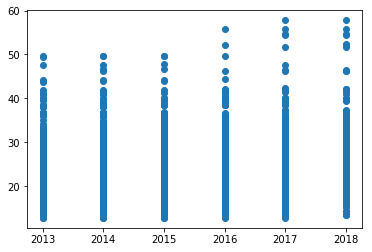

In [5]:
plt.scatter(data= fuel_econ, x ='year', y = 'comb');

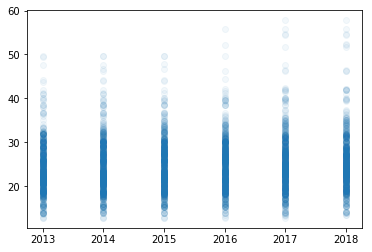

In [10]:
plt.scatter(data=fuel_econ, x= 'year', y ='comb', alpha = 0.05);

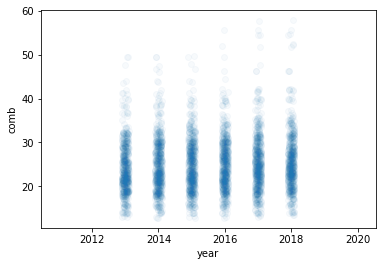

In [15]:
# scatter_kws
sb.regplot(data = fuel_econ, x = 'year', y = 'comb', fit_reg = False, x_jitter = 0.1, 
          y_jitter = 0.1, scatter_kws = {'alpha' :0.03});

### Heat Maps
A  **heat map** is a 2-d version of the histogram that can be used as an alternative to a scatterplot. Like a scatterplot, the values of the two numeric variables to be plotted are placed on the plot axes. Similar to a histogram, the plotting area is divided into a grid and the number of points in each grid rectangle is added up. Since there won't be room for bar heights, counts are indicated instead by grid cell color. A heat map can be implemented with Matplotlib's hist2d function.
```python
plt.figure(figsize = [12, 5])

# left plot: scatterplot of discrete data with jitter and transparency
plt.subplot(1, 2, 1)
sb.regplot(data = df, x = 'disc_var1', y = 'disc_var2', fit_reg = False,
           x_jitter = 0.2, y_jitter = 0.2, scatter_kws = {'alpha' : 1/3})

# right plot: heat map with bin edges between values
plt.subplot(1, 2, 2)
bins_x = np.arange(0.5, 10.5+1, 1)
bins_y = np.arange(-0.5, 10.5+1, 1)
plt.hist2d(data = df, x = 'disc_var1', y = 'disc_var2',
           bins = [bins_x, bins_y])
plt.colorbar();
```

Notice that since we have two variables, the "bins" parameter takes a list of two bin edge specifications, one for each dimension. Choosing an appropriate bin size is just as important here as it was for the univariate histogram. We add a `colorbar` function call to add a colorbar to the side of the plot, showing the mapping from counts to colors.
![heatmap01](img/heatmap01.jpg)

As the color in the heatmap gets brighter and moves from blue to yellow, the higher the count of points in the corresponding cell.

Heatmaps can also be used as 2-d versions of bar charts, plotting counts on combinations of two categorical variables instead of numeric variables. There is a function in `seaborn`, heatmap, that is built for categorical heatmaps. This will be discussed in more detail later in the lesson, in the section "Clustered Bar Charts".

#### Additional Variations
To select a different color palette, you can set the "cmap" parameter in `hist2d`. The most convenient way of setting a palette is to use a string referencing a built-in Matplotlib palette. A list of valid strings can be found on [this part](https://matplotlib.org/api/pyplot_summary.html#colors-in-matplotlib) of the Pyplot API documentation. A further discussion of color in plots will be left to the next lesson. For now, I will just show an example of reversing the default "viridis" color palette, by setting `cmap = 'viridis_r'`.

Furthermore, I would like to distinguish cells with zero counts from those with non-zero counts. The "cmin" parameter specifies the minimum value in a cell before it will be plotted. By adding a `cmin = 0.5` parameter to the `hist2d` call, this means that a cell will only get colored if it contains at least one point.

```python
bins_x = np.arange(0.5, 10.5+1, 1)
bins_y = np.arange(-0.5, 10.5+1, 1)
plt.hist2d(data = df, x = 'disc_var1', y = 'disc_var2',
           bins = [bins_x, bins_y], cmap = 'viridis_r', cmin = 0.5)
plt.colorbar()
```
![heatmap02](img/heatmap02.jpg)

If you have a lot of data, you might want to add annotations to cells in the plot indicating the count of points in each cell. From `hist2d`, this requires the addition of text elements one by one, much like how text annotations were added one by one to the bar plots in the previous lesson. We can get the counts to annotate directly from what is returned by `hist2d`, which includes not just the plotting object, but an array of counts and two vectors of bin edges.
```python
# hist2d returns a number of different variables, including an array of counts
bins_x = np.arange(0.5, 10.5+1, 1)
bins_y = np.arange(-0.5, 10.5+1, 1)
h2d = plt.hist2d(data = df, x = 'disc_var1', y = 'disc_var2',
               bins = [bins_x, bins_y], cmap = 'viridis_r', cmin = 0.5)
counts = h2d[0]

# loop through the cell counts and add text annotations for each
for i in range(counts.shape[0]):
    for j in range(counts.shape[1]):
        c = counts[i,j]
        if c >= 7: # increase visibility on darkest cells
            plt.text(bins_x[i]+0.5, bins_y[j]+0.5, int(c),
                     ha = 'center', va = 'center', color = 'white')
        elif c > 0:
            plt.text(bins_x[i]+0.5, bins_y[j]+0.5, int(c),
                     ha = 'center', va = 'center', color = 'black')
```
![heatmap03](img/heatmap03.jpg)

If you have too many cells in your heat map, then the annotations will end up being too overwhelming, too much to attend to. In cases like that, it's best to leave off the annotations and let the data and colorbar speak for themselves. You're more likely to see annotations in a categorical heat map, where there are going to be fewer cells plotted. Indeed, there is a parameter built into seaborn's heatmap function for just that, as will be seen later.

In [24]:
fuel_econ[['displ','comb']].describe()

,displ,comb
count,3929.000000,3929.000000
mean,2.950573,24.791339
std,1.305901,6.003246
min,0.600000,12.821700
25%,2.000000,20.658100
50%,2.500000,24.000000
75%,3.600000,28.227100
max,7.000000,57.782400


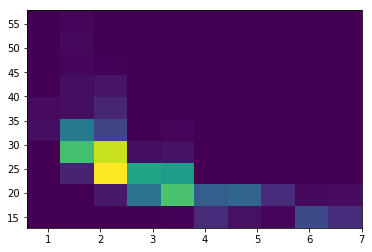

In [19]:
plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb');

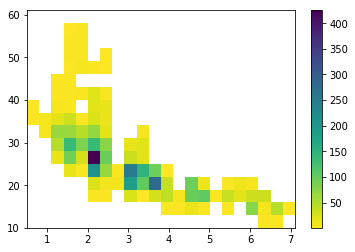

In [30]:
bins_x = np.arange(0.5, 7+0.3, 0.3)
bins_y = np.arange(10, 60+3, 3)
plt.hist2d(data = fuel_econ, x= 'displ', y = 'comb', cmin = 0.5, 
           cmap = 'viridis_r', bins=[bins_x,bins_y]);
plt.colorbar();
